In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import time

# Iris veri seti
df = pd.read_csv("Iris.csv")


X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y_str = df["Species"].values

# Etiketleri sayısala çevirme
le = LabelEncoder()
y = le.fit_transform(y_str)

# Train / test böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardizasyon
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tensörlere çevirme
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

num_features = X_train.shape[1]
num_classes = len(le.classes_)

print("Eğitim örnek sayısı:", len(train_dataset))
print("Test örnek sayısı:", len(test_dataset))
print("Sınıf sayısı:", num_classes)


Eğitim örnek sayısı: 120
Test örnek sayısı: 30
Sınıf sayısı: 3


Model1 - Epoch [1/100], Loss: 1.0402
Model1 - Epoch [2/100], Loss: 0.7260
Model1 - Epoch [3/100], Loss: 0.5424
Model1 - Epoch [4/100], Loss: 0.4429
Model1 - Epoch [5/100], Loss: 0.3571
Model1 - Epoch [6/100], Loss: 0.2999
Model1 - Epoch [7/100], Loss: 0.2705
Model1 - Epoch [8/100], Loss: 0.2450
Model1 - Epoch [9/100], Loss: 0.2257
Model1 - Epoch [10/100], Loss: 0.1960
Model1 - Epoch [11/100], Loss: 0.1809
Model1 - Epoch [12/100], Loss: 0.1674
Model1 - Epoch [13/100], Loss: 0.1388
Model1 - Epoch [14/100], Loss: 0.1245
Model1 - Epoch [15/100], Loss: 0.1107
Model1 - Epoch [16/100], Loss: 0.1030
Model1 - Epoch [17/100], Loss: 0.0961
Model1 - Epoch [18/100], Loss: 0.0896
Model1 - Epoch [19/100], Loss: 0.0845
Model1 - Epoch [20/100], Loss: 0.0795
Model1 - Epoch [21/100], Loss: 0.0758
Model1 - Epoch [22/100], Loss: 0.0730
Model1 - Epoch [23/100], Loss: 0.0685
Model1 - Epoch [24/100], Loss: 0.0739
Model1 - Epoch [25/100], Loss: 0.0639
Model1 - Epoch [26/100], Loss: 0.0750
Model1 - Epoch [27/10

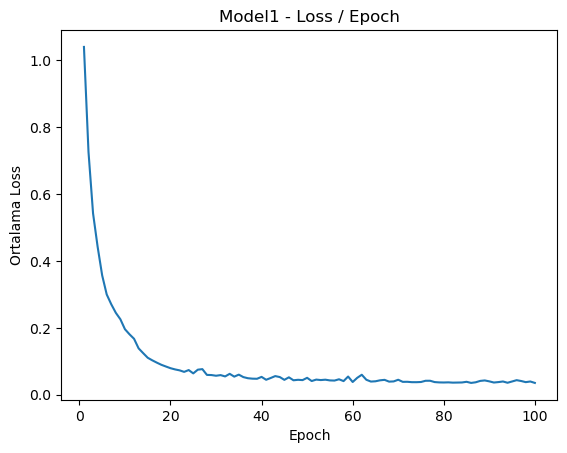

In [72]:
class Net1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)   
        return x

model1 = Net1(num_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.01)

num_epochs = 100
losses_model1 = []

for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    batch_count = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        batch_count += 1

    avg_loss = running_loss / batch_count
    losses_model1.append(avg_loss)

    print(f"Model1 - Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Test doğruluğu (accuracy)
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc1 = correct / total

print("Model1 Test Doğruluğu:", acc1)

# Model1 için Loss / Epoch grafiği
plt.figure()
plt.plot(range(1, num_epochs+1), losses_model1)
plt.xlabel("Epoch")
plt.ylabel("Ortalama Loss")
plt.title("Model1 - Loss / Epoch")
plt.show()


In [73]:

class Net2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class Net3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train_and_evaluate(model, train_loader, test_loader, num_epochs=100, learning_rate=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        batch_count = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batch_count += 1

        epoch_loss = running_loss / batch_count
        losses.append(epoch_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    train_time = time.time() - start_time

    # Test doğruluğu (accuracy)
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total

    return losses, train_time, accuracy


---- Model1 (4-16-3) ----
Epoch [1/100], Loss: 1.0030
Epoch [2/100], Loss: 0.7238
Epoch [3/100], Loss: 0.5494
Epoch [4/100], Loss: 0.4302
Epoch [5/100], Loss: 0.3485
Epoch [6/100], Loss: 0.2948
Epoch [7/100], Loss: 0.2526
Epoch [8/100], Loss: 0.2303
Epoch [9/100], Loss: 0.2031
Epoch [10/100], Loss: 0.1596
Epoch [11/100], Loss: 0.1491
Epoch [12/100], Loss: 0.1315
Epoch [13/100], Loss: 0.1125
Epoch [14/100], Loss: 0.0999
Epoch [15/100], Loss: 0.0934
Epoch [16/100], Loss: 0.0849
Epoch [17/100], Loss: 0.0852
Epoch [18/100], Loss: 0.0728
Epoch [19/100], Loss: 0.0694
Epoch [20/100], Loss: 0.0706
Epoch [21/100], Loss: 0.0634
Epoch [22/100], Loss: 0.0603
Epoch [23/100], Loss: 0.0714
Epoch [24/100], Loss: 0.0628
Epoch [25/100], Loss: 0.0601
Epoch [26/100], Loss: 0.0598
Epoch [27/100], Loss: 0.0551
Epoch [28/100], Loss: 0.0588
Epoch [29/100], Loss: 0.0522
Epoch [30/100], Loss: 0.0555
Epoch [31/100], Loss: 0.0587
Epoch [32/100], Loss: 0.0519
Epoch [33/100], Loss: 0.0508
Epoch [34/100], Loss: 0.04

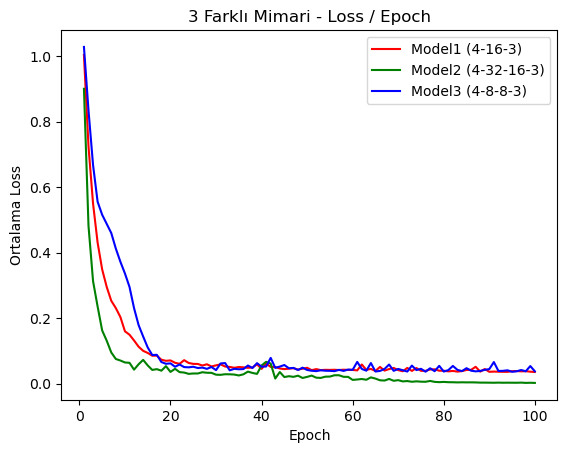

,Model,Test Accuracy,Training Time (s),Final Train Loss
0,Model1 (4-16-3),0.966667,0.260155,0.035289
1,Model2 (4-32-16-3),0.933333,0.324711,0.001914
2,Model3 (4-8-8-3),0.966667,0.311270,0.037325


In [74]:
num_epochs = 100

models = {
    "Model1 (4-16-3)": Net1(num_features, num_classes),
    "Model2 (4-32-16-3)": Net2(num_features, num_classes),
    "Model3 (4-8-8-3)": Net3(num_features, num_classes),
}

results = {}

for name, model in models.items():
    print("----", name, "----")
    losses, train_time, accuracy = train_and_evaluate(
        model, train_loader, test_loader, num_epochs=num_epochs, learning_rate=0.01
    )
    results[name] = {
        "losses": losses,
        "time": train_time,
        "accuracy": accuracy,
    }

plt.figure()

# Her model için renk atamaları
color_map = {
    "Model1 (4-16-3)": "r",
    "Model2 (4-32-16-3)": "g",
    "Model3 (4-8-8-3)": "b",
}

for name, res in results.items():
    plt.plot(
        range(1, num_epochs + 1),
        res["losses"],
        label=name,
        color=color_map.get(name)
    )

plt.xlabel("Epoch")
plt.ylabel("Ortalama Loss")
plt.title("3 Farklı Mimari - Loss / Epoch")
plt.legend()
plt.show()

# TÜM SONUÇLAR TABLOSU
table_rows = []

for name, res in results.items():
    row = {
        "Model": name,
        "Test Accuracy": res["accuracy"],
        "Training Time (s)": res["time"],
        "Final Train Loss": res["losses"][-1],
    }
    table_rows.append(row)

results_df = pd.DataFrame(table_rows)

results_df


Epoch [1/100], Loss: 0.9238
Epoch [2/100], Loss: 0.6447
Epoch [3/100], Loss: 0.4649
Epoch [4/100], Loss: 0.3711
Epoch [5/100], Loss: 0.3290
Epoch [6/100], Loss: 0.2961
Epoch [7/100], Loss: 0.2751
Epoch [8/100], Loss: 0.2369
Epoch [9/100], Loss: 0.2143
Epoch [10/100], Loss: 0.2010
Epoch [11/100], Loss: 0.1787
Epoch [12/100], Loss: 0.1652
Epoch [13/100], Loss: 0.1446
Epoch [14/100], Loss: 0.1246
Epoch [15/100], Loss: 0.1211
Epoch [16/100], Loss: 0.1103
Epoch [17/100], Loss: 0.1105
Epoch [18/100], Loss: 0.0901
Epoch [19/100], Loss: 0.0825
Epoch [20/100], Loss: 0.0745
Epoch [21/100], Loss: 0.0716
Epoch [22/100], Loss: 0.0833
Epoch [23/100], Loss: 0.0674
Epoch [24/100], Loss: 0.0659
Epoch [25/100], Loss: 0.0615
Epoch [26/100], Loss: 0.0659
Epoch [27/100], Loss: 0.0591
Epoch [28/100], Loss: 0.0648
Epoch [29/100], Loss: 0.0588
Epoch [30/100], Loss: 0.0554
Epoch [31/100], Loss: 0.0524
Epoch [32/100], Loss: 0.0521
Epoch [33/100], Loss: 0.0518
Epoch [34/100], Loss: 0.0523
Epoch [35/100], Loss: 0

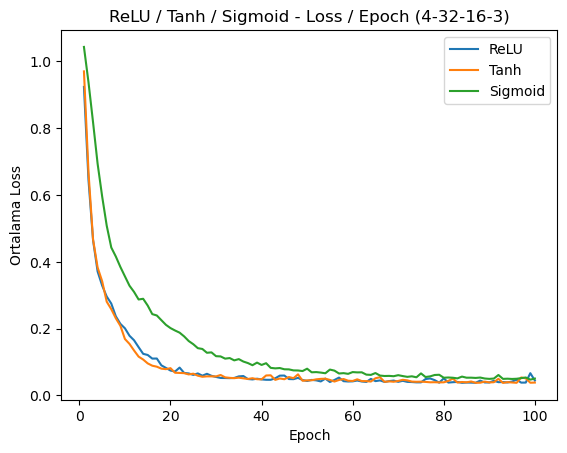

,Activation,Test Accuracy,Training Time (s),Final Train Loss
0,ReLU,0.966667,0.274486,0.044669
1,Tanh,0.966667,0.257449,0.038552
2,Sigmoid,0.966667,0.255330,0.050521


In [75]:
# sonuçlara göre en başarılı ve en hızlı model Net1 
class Net1(nn.Module):
    def __init__(self, input_size, num_classes, activation_name):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, num_classes)
        self.activation_name = activation_name

    def activate(self, x):
        if self.activation_name == "relu":
            return torch.relu(x)
        elif self.activation_name == "tanh":
            return torch.tanh(x)
        elif self.activation_name == "sigmoid":
            return torch.sigmoid(x)
        else:
            return torch.relu(x)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activate(x)
        x = self.fc2(x)
        return x


activation_models = {
    "ReLU": Net1(num_features, num_classes, "relu"),
    "Tanh": Net1(num_features, num_classes, "tanh"),
    "Sigmoid": Net1(num_features, num_classes, "sigmoid"),
}

activation_results = {}

for name, model in activation_models.items():
    losses, train_time, accuracy = train_and_evaluate(
        model, train_loader, test_loader, num_epochs=num_epochs, learning_rate=0.01
    )
    activation_results[name] = {
        "losses": losses,
        "time": train_time,
        "accuracy": accuracy,
    }
    

plt.figure()
for name in activation_results:
    plt.plot(range(1, num_epochs + 1), activation_results[name]["losses"], label=name)

plt.xlabel("Epoch")
plt.ylabel("Ortalama Loss")
plt.title("ReLU / Tanh / Sigmoid - Loss / Epoch (4-32-16-3)")
plt.legend()
plt.show()

# TÜM AKTİVASYONLARI TEK TABLODA GÖSTER
table_rows = []

for name, res in activation_results.items():
    row = {
        "Activation": name,
        "Test Accuracy": res["accuracy"],
        "Training Time (s)": res["time"],
        "Final Train Loss": res["losses"][-1],
    }
    table_rows.append(row)

activation_results_df = pd.DataFrame(table_rows)

activation_results_df